In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
a = 0.18
b = 1.41
c = 2.0
d = 1.0

In [3]:
e0 = np.array([1, 0])
e1 = np.array([0, 1])

In [4]:
A = np.array([[d, -1.0],
             [-1.0, c]])

B = np.array([[-d, 1.0],
             [1.0, -c]])

In [5]:
x0, y0 = .7, .3

In [6]:
def EWA_Alt_Hardcode(X, a=.18, b=1.41):
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    Y = np.array([y0, y1])
    Ay0 = d*y0-y1
    Ay1 = -y0+c*y1
    #Update x
    XNum = math.pow(x0, 1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*(Ay1-Ay0))
    #Update y
    fx0 = XNum / XDenom
    fx1 = 1.0 - fx0
    
    Bx0 = -d*fx0+fx1
    Bx1 = fx0-c*fx1
    YNum = math.pow(y0, 1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*(Bx1-Bx0))
    fy0 = YNum / YDenom
    return [fx0, fy0]

In [7]:
def EWA_Alternating(X, a=.18, b=1.41):
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    Y = np.array([y0, y1])
    #Update x
    XNum = math.pow(x0, 1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*(np.dot(e1, np.dot(A, Y))-np.dot(e0,np.dot(A,Y))))
    #Update y
    fx0 = XNum / XDenom
    fx1 = 1.0 - fx0
    
    FX = np.array([fx0, fx1])
    YNum = math.pow(y0, 1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*(np.dot(e1,np.dot(B,FX))-np.dot(e0,np.dot(B,FX))))
    fy0 = YNum / YDenom
    return [fx0, fy0]

In [8]:
def EWA_Alt(X, a=.18, b=1.41):
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    a11, a12, a21, a22 = d, -1.0, -1.0, c
    b11, b12, b21, b22 = -d, 1.0, 1.0, -c
    Ay0 = a11*y0+a12*y1
    Ay1 = a21*y0+a22*y1
    #Update x
    XNum = math.pow(x0, 1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*(Ay1-Ay0))
    #Update y
    fx0 = XNum / XDenom
    
    fx1 = 1.0 - fx0
    Bx0 = b11*fx0+b12*fx1
    Bx1 = b21*fx0+b22*fx1
    YNum = math.pow(y0, 1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*(Bx1-Bx0))
    fy0 = YNum / YDenom
    return [fx0, fy0]

In [9]:
N = 350

In [10]:
init = [.3,.3]
traj = [init]
X = init
for i in range(0,N):
    X = EWA_Alt(X,a,b)
    traj . append ( X )
traj = traj[200:]

In [11]:
x0,y0 = 0.3, 0.3
x1,y1 = 1.0-x0, 1.0-y0

In [12]:
print(x0,y0)
print(x1,y1)

0.3 0.3
0.7 0.7


In [13]:
a11, a12, a21, a22 = d, -1.0, -1.0, c
b11, b12, b21, b22 = -d, 1.0, 1.0, -c
Ay0 = a11*y0+a12*y1
Ay1 = a21*y0+a22*y1
print(Ay0, Ay1)

-0.39999999999999997 1.0999999999999999


In [14]:
Y = np.array([y0, y1])
print(np.dot(e0,np.dot(A,Y)), np.dot(e1, np.dot(A, Y)))

-0.39999999999999997 1.0999999999999999


In [15]:
A

array([[ 1., -1.],
       [-1.,  2.]])

In [16]:
a11, a12

(1.0, -1.0)

In [17]:
print(EWA_Alt ( X, a, b))
print(EWA_Alternating (X, a, b))
print(EWA_Alt_Hardcode( X, a, b))

[0.5886701884315262, 0.609152443944444]
[0.5886701884315262, 0.609152443944444]
[0.5886701884315262, 0.609152443944444]


In [18]:
# init = [.3,.3]
# traj1 = [init]
# X = init
# for i in range(0,N):
#     X = EWA_Alt(X,a,b)
#     traj1 . append ( X )
# traj1 = traj1[100:]

In [19]:
x,y = zip(*traj)

In [20]:
#x1,y1 = zip(*traj1)

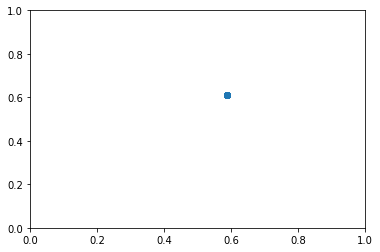

In [21]:
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(x,y)
#plt.scatter(x1,y1)

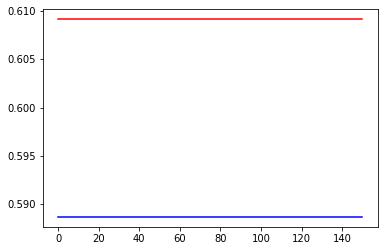

In [22]:
plt.plot(x, 'b', y, 'r')

In [23]:
len(set(x))

5

In [24]:
len(set(y))

4

In [25]:
len(set(x))

5

In [26]:
x

(0.5886701884315261,
 0.5886701884315262,
 0.5886701884315263,
 0.5886701884315257,
 0.5886701884315264,
 0.5886701884315262,
 0.5886701884315261,
 0.5886701884315262,
 0.5886701884315263,
 0.5886701884315257,
 0.5886701884315264,
 0.5886701884315262,
 0.5886701884315261,
 0.5886701884315262,
 0.5886701884315263,
 0.5886701884315257,
 0.5886701884315264,
 0.5886701884315262,
 0.5886701884315261,
 0.5886701884315262,
 0.5886701884315263,
 0.5886701884315257,
 0.5886701884315264,
 0.5886701884315262,
 0.5886701884315261,
 0.5886701884315262,
 0.5886701884315263,
 0.5886701884315257,
 0.5886701884315264,
 0.5886701884315262,
 0.5886701884315261,
 0.5886701884315262,
 0.5886701884315263,
 0.5886701884315257,
 0.5886701884315264,
 0.5886701884315262,
 0.5886701884315261,
 0.5886701884315262,
 0.5886701884315263,
 0.5886701884315257,
 0.5886701884315264,
 0.5886701884315262,
 0.5886701884315261,
 0.5886701884315262,
 0.5886701884315263,
 0.5886701884315257,
 0.5886701884315264,
 0.5886701884